In [1]:
import pandas as pd
import numpy as np
import unidecode
import matplotlib as mpl
from adjustText import adjust_text
import matplotlib.pyplot as plt

In [2]:
background = '#D7E5E5'
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 15
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['savefig.facecolor']='white'
mpl.rcParams['axes.titleweight'] = 'heavy'

In [3]:
url_passing = 'https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats'
url_possession = 'https://fbref.com/en/comps/Big5/possession/players/Big-5-European-Leagues-Stats'
url_defence = 'https://fbref.com/en/comps/Big5/defense/players/Big-5-European-Leagues-Stats'

In [4]:
data_passing = pd.read_html(url_passing, header=1)[0]
data_passing = data_passing[data_passing['Player'] != 'Player']
data_passing

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Cmp,...,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-032,2000,20.9,718,...,45.3,1,0.9,+0.1,12,36,28,7,72,Matches
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-130,1987,21.0,794,...,65.2,0,0.2,-0.2,6,44,4,0,48,Matches
2,3,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-316,2000,18.2,1109,...,86.6,0,0.8,-0.8,8,46,5,0,43,Matches
3,4,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-004,1993,20.3,836,...,68.0,1,1.7,-0.7,14,78,13,6,79,Matches
4,5,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-299,2000,0.5,2,...,NaN,0,0.0,0.0,0,0,0,0,0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,2641,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-003,1999,14.3,579,...,71.4,1,0.4,+0.6,8,59,6,1,51,Matches
2746,2642,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-133,1997,13.2,425,...,69.4,1,0.9,+0.1,11,33,14,2,44,Matches
2747,2643,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-050,1998,14.5,616,...,64.5,4,3.5,+0.5,36,39,27,1,67,Matches
2748,2644,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-259,1990,10.5,144,...,75.0,0,0.6,-0.6,7,11,0,0,12,Matches


In [5]:
data_possession = pd.read_html(url_possession, header=1)[0]
data_possession = data_possession[data_possession['Player'] != 'Player']
data_possession

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Touches,...,Prog,1/3,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-032,2000,20.9,1209,...,118,38,8,16,20,767,692,90.2,29,Matches
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-130,1987,21.0,1201,...,51,14,0,11,8,756,738,97.6,9,Matches
2,3,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-316,2000,18.2,1367,...,50,11,3,7,28,1144,1070,93.5,31,Matches
3,4,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-004,1993,20.3,1250,...,66,23,2,13,31,935,882,94.3,37,Matches
4,5,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-299,2000,0.5,12,...,0,1,0,4,0,12,8,66.7,2,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,2641,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-003,1999,14.3,803,...,58,16,0,10,6,573,553,96.5,15,Matches
2746,2642,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-133,1997,13.2,717,...,102,38,4,20,29,559,492,88.0,55,Matches
2747,2643,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-050,1998,14.5,870,...,85,29,4,21,26,734,641,87.3,61,Matches
2748,2644,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-259,1990,10.5,351,...,9,2,3,21,8,467,286,61.2,46,Matches


In [6]:
data_defence = pd.read_html(url_defence, header=1)[0]
data_defence = data_defence[data_defence['Player'] != 'Player']
data_defence

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,...,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-032,2000,20.9,48,...,24,54,15,0,39,30,78,40,0,Matches
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-130,1987,21.0,38,...,16,44,18,1,26,73,111,69,0,Matches
2,3,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-316,2000,18.2,41,...,45,20,1,0,19,37,78,12,0,Matches
3,4,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-004,1993,20.3,69,...,56,30,1,0,29,50,119,9,0,Matches
4,5,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-299,2000,0.5,0,...,3,1,0,0,1,0,0,0,0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,2641,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-003,1999,14.3,34,...,28,18,7,0,11,20,54,23,0,Matches
2746,2642,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-133,1997,13.2,31,...,57,23,4,0,19,26,57,16,2,Matches
2747,2643,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-050,1998,14.5,21,...,100,7,1,0,6,8,29,7,1,Matches
2748,2644,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-259,1990,10.5,3,...,42,3,2,0,1,2,5,15,0,Matches


In [7]:
d1 = data_passing[['Player', 'Pos', '90s', 'Prog']]
d2 = data_possession[['Player', 'Touches', 'Prog', 'Succ']]
d3 = data_defence[['Player', 'TklW', 'Succ', 'Blocks', 'Int', 'Clr']]
d = pd.DataFrame(columns=['Player', '90s', 'Touches', 'Prog Passes', 'DribblesS', 'Prog Carries', 'TklW', 'PressureS', 'Blocks', 'Int', 'Clr'])
d['Player'] = d1['Player']
d['90s'] = d1['90s']
d['Touches'] = d2['Touches']
d['Prog Passes'] = d1['Prog']
d['DribblesS'] = d2['Succ']
d['Prog Carries'] = d2['Prog']
d['TklW'] = d3['TklW']
d['PressureS'] = d3['Succ']
d['Blocks'] = d3['Blocks']
d['Int'] = d3['Int']
d['Clr'] = d3['Clr']
d.iloc[:, 1:] = d.iloc[:, 1:].astype(float)
d

,Player,90s,Touches,Prog Passes,DribblesS,Prog Carries,TklW,PressureS,Blocks,Int,Clr
0,Max Aarons,20.9,1209.0,72.0,25.0,118.0,29.0,66.0,54.0,30.0,40.0
1,Yunis Abdelhamid,21.0,1201.0,48.0,11.0,51.0,29.0,109.0,44.0,73.0,69.0
2,Salis Abdul Samed,18.2,1367.0,43.0,19.0,50.0,25.0,121.0,20.0,37.0,12.0
3,Laurent Abergel,20.3,1250.0,79.0,29.0,66.0,40.0,161.0,30.0,50.0,9.0
4,Charles Abi,0.5,12.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2745,Martín Zubimendi,14.3,803.0,51.0,3.0,58.0,16.0,60.0,18.0,20.0,23.0
2746,Szymon Żurkowski,13.2,717.0,44.0,18.0,102.0,22.0,60.0,23.0,26.0,16.0
2747,Martin Ødegaard,14.5,870.0,67.0,8.0,85.0,12.0,77.0,7.0,8.0,7.0
2748,Milan Đurić,10.5,351.0,12.0,3.0,9.0,2.0,16.0,3.0,2.0,15.0


In [8]:
player_position = pd.read_excel('Player Positions-FBRef format.xlsx')
player_position.drop_duplicates(inplace=True)
set(player_position['Position'])

{'Attacking Midfield',
 'Central Midfield',
 'Centre-Back',
 'Centre-Forward',
 'Defender',
 'Defensive Midfield',
 'Goalkeeper',
 'Left Midfield',
 'Left Winger',
 'Left-Back',
 'Right Midfield',
 'Right Winger',
 'Right-Back',
 'Second Striker',
 'attack',
 'midfield'}

In [9]:
data = pd.merge(player_position, d, on="Player")
data.drop_duplicates(inplace=True)
data['Progressive Actions'] = data['Prog Passes'] + data['DribblesS'] + data['Prog Carries']
data['Defensive Actions'] = data['TklW'] + data['PressureS'] + data['Blocks'] + data['Int'] + data['Clr']
data = data[data['90s']>=5.0]
data['PAp90'] = data['Progressive Actions']/data['90s']
data['DAp90'] = data['Defensive Actions']/data['90s']
who = ['Defensive Midfield', 'Central Midfield']
data = data[data['Position'].apply(lambda x: x in who)]
data

,S. No.,Player,Position,90s,Touches,Prog Passes,DribblesS,Prog Carries,TklW,PressureS,Blocks,Int,Clr,Progressive Actions,Defensive Actions,PAp90,DAp90
1,7,Laurent Abergel,Defensive Midfield,20.3,1250.0,79.0,29.0,66.0,40.0,161.0,30.0,50.0,9.0,174.0,290.0,8.571429,14.285714
9,19,Tyler Adams,Defensive Midfield,11.3,823.0,44.0,5.0,65.0,9.0,75.0,21.0,20.0,13.0,114.0,138.0,10.088496,12.212389
13,27,Lucien Agoume,Defensive Midfield,12.5,699.0,42.0,15.0,33.0,25.0,64.0,20.0,31.0,21.0,90.0,161.0,7.2,12.88
19,37,Jean-Eudes Aholou,Defensive Midfield,6.5,327.0,14.0,5.0,24.0,6.0,23.0,5.0,13.0,10.0,43.0,57.0,6.615385,8.769231
34,56,Luis Alberto,Central Midfield,15.2,1301.0,99.0,14.0,112.0,14.0,63.0,13.0,10.0,3.0,225.0,103.0,14.802632,6.776316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,2795,Andre-Frank Zambo Anguissa,Defensive Midfield,13.1,956.0,67.0,21.0,74.0,20.0,81.0,16.0,25.0,20.0,162.0,162.0,12.366412,12.366412
1894,2801,Oier Zarraga,Central Midfield,7.5,386.0,44.0,4.0,34.0,2.0,23.0,10.0,10.0,4.0,82.0,49.0,10.933333,6.533333
1901,2810,Piotr Zieliński,Central Midfield,14.9,912.0,68.0,18.0,80.0,10.0,50.0,22.0,9.0,3.0,166.0,94.0,11.14094,6.308725
1906,2818,Igor Zubeldia,Defensive Midfield,8.0,536.0,12.0,2.0,18.0,8.0,22.0,12.0,10.0,25.0,32.0,77.0,4.0,9.625


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

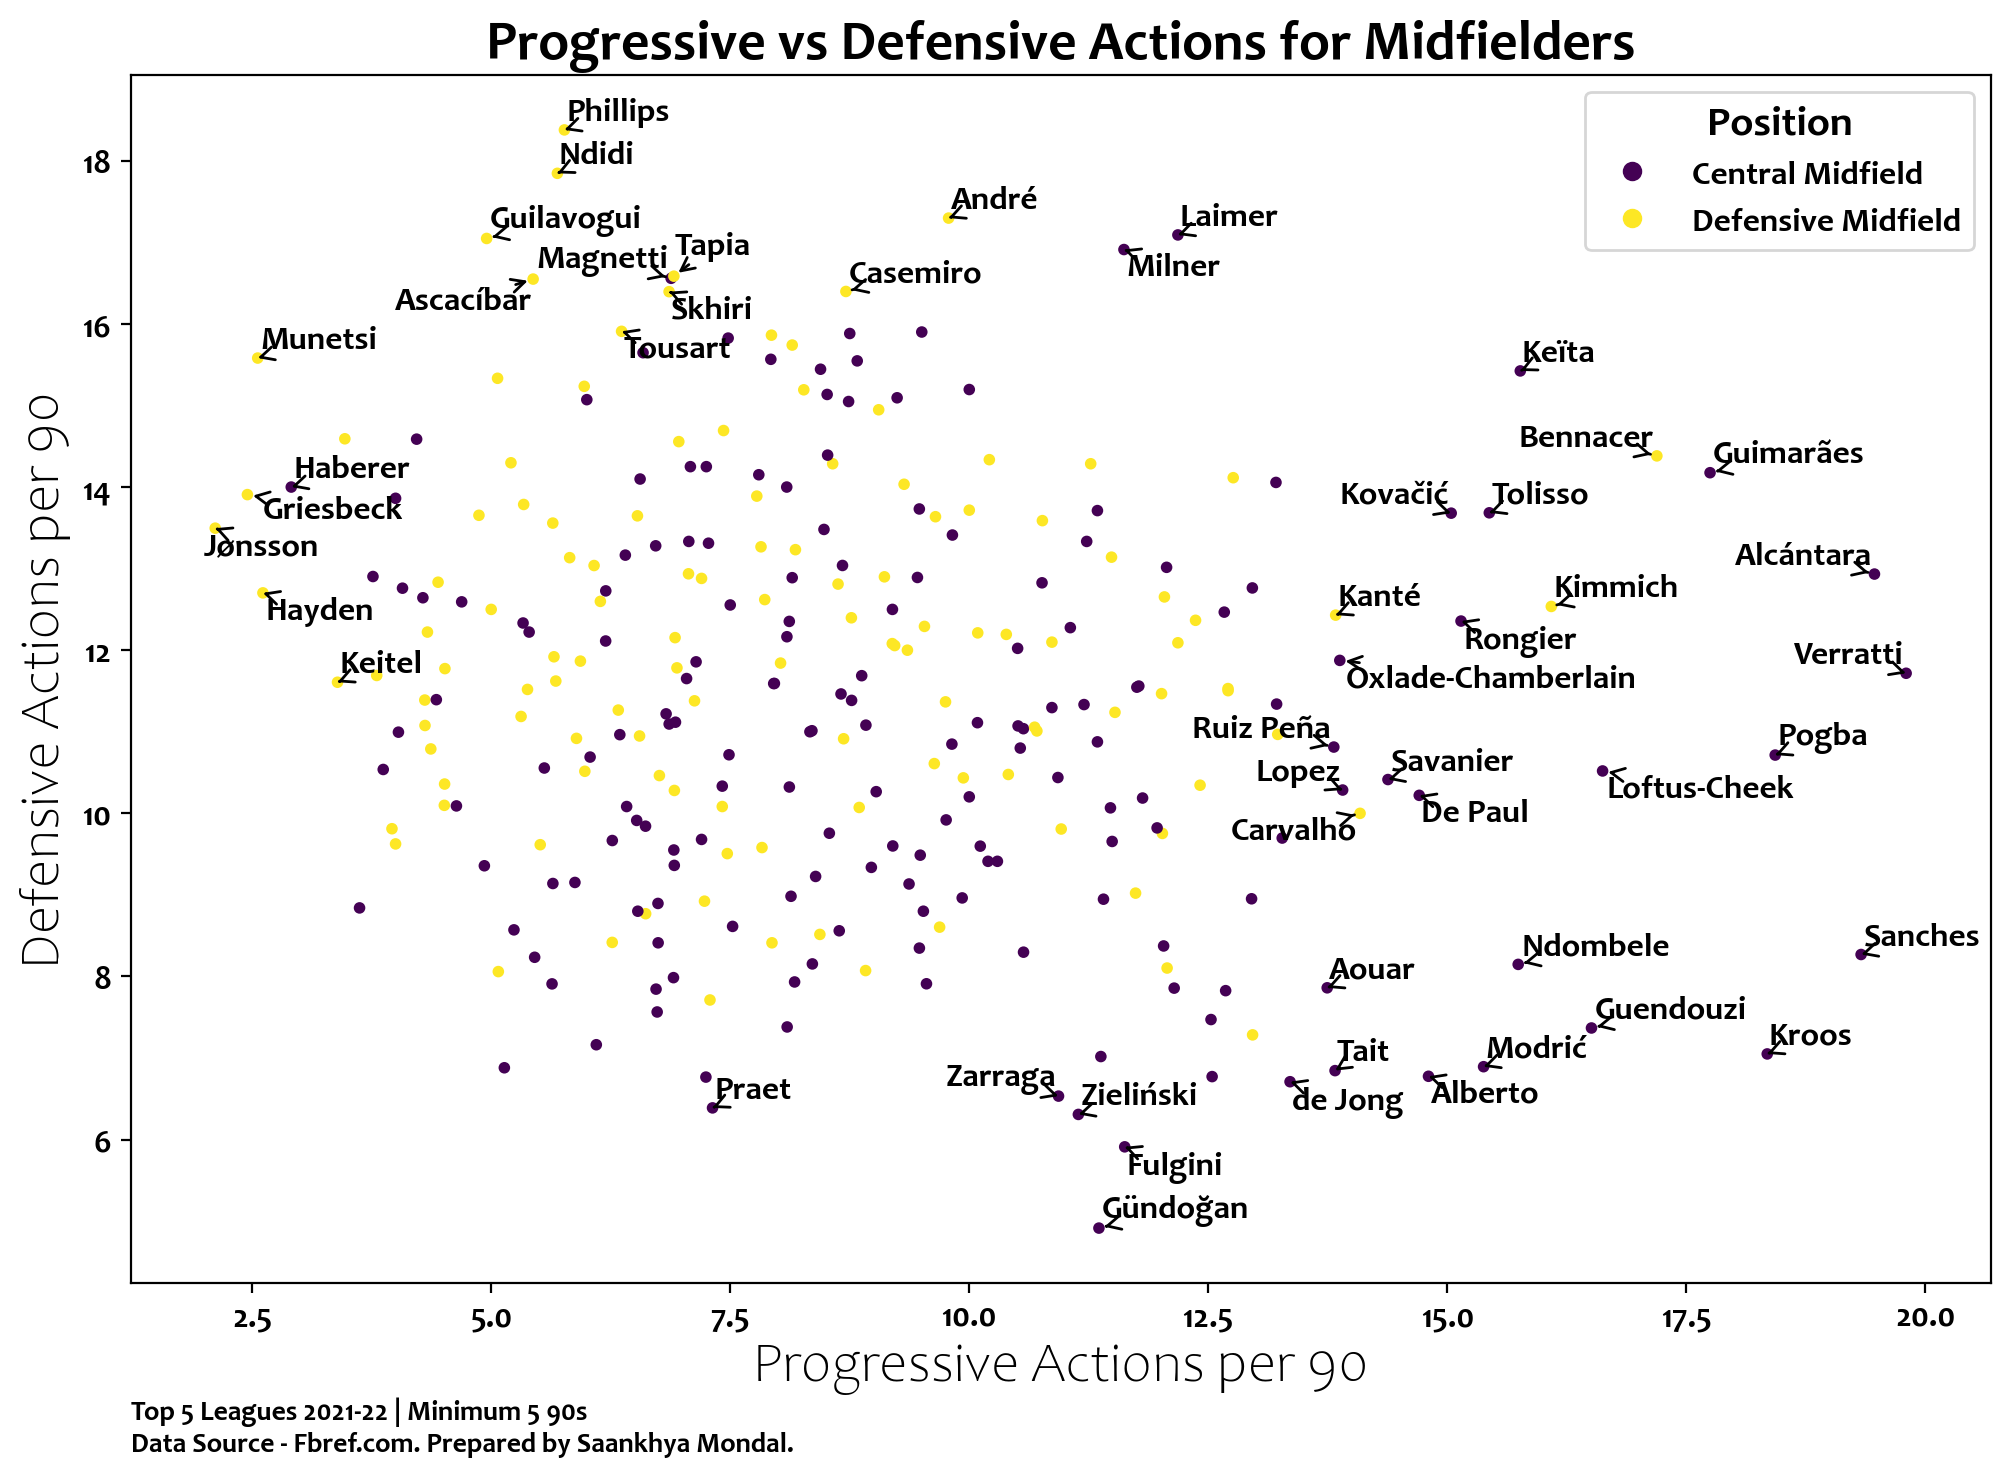

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
par_x = list(data['PAp90'])
par_y = list(data['DAp90'])
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, c=col_codes, s=10)

outlier_top = data['DAp90'].astype(float).quantile(0.96)
outlier_bottom = data['DAp90'].astype(float).quantile(0.02)
outlier_right = data['PAp90'].astype(float).quantile(0.91)
outlier_left = data['PAp90'].astype(float).quantile(0.02)

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top or par_x[i]<outlier_left or par_y[i]<outlier_bottom:
        if len(txt.split()) != 1:
            txt = ' '.join(txt.split()[1:])
        txts.append(plt.text(par_x[i], par_y[i], txt))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='black'))
ax.set_xlabel('Progressive Actions per 90', fontsize=20)
ax.set_ylabel('Defensive Actions per 90', fontsize=20)
ax.set_title('Progressive vs Defensive Actions for Midfielders', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=['Central Midfield', 'Defensive Midfield'], title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [11]:
fig.savefig('Images/PAp90vDAp90_CM_DM.png', dpi=400, bbox_inches='tight')

In [12]:
data = pd.merge(player_position, d, on="Player")
data.drop_duplicates(inplace=True)
data['Progressive Actions'] = data['Prog Passes'] + data['DribblesS'] + data['Prog Carries']
data['Defensive Actions'] = data['TklW'] + data['PressureS'] + data['Blocks'] + data['Int'] + data['Clr']
data = data[data['90s']>=5.0]
data['PAp90'] = data['Progressive Actions']/data['90s']
data['DAp90'] = data['Defensive Actions']/data['90s']
who = ['Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x: x in who)]
data

,S. No.,Player,Position,90s,Touches,Prog Passes,DribblesS,Prog Carries,TklW,PressureS,Blocks,Int,Clr,Progressive Actions,Defensive Actions,PAp90,DAp90
7,17,Marcos Acuña,Left-Back,14.6,1292.0,77.0,28.0,96.0,19.0,42.0,16.0,20.0,20.0,201.0,117.0,13.767123,8.013699
12,26,Martin Agirregabiria,Right-Back,15.6,864.0,51.0,13.0,42.0,19.0,51.0,27.0,21.0,40.0,106.0,158.0,6.794872,10.128205
17,32,Ruben Aguilar,Right-Back,13.8,1271.0,85.0,6.0,96.0,29.0,82.0,20.0,35.0,44.0,187.0,210.0,13.550725,15.217391
21,39,Ola Aina,Right-Back,11.8,719.0,49.0,14.0,61.0,12.0,46.0,20.0,27.0,24.0,124.0,129.0,10.508475,10.932203
22,41,Rayan Aït Nouri,Left-Back,10.0,669.0,23.0,22.0,64.0,25.0,74.0,18.0,19.0,16.0,109.0,152.0,10.9,15.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,2749,Brandon Williams,Left-Back,14.6,907.0,57.0,11.0,59.0,16.0,58.0,36.0,40.0,25.0,127.0,175.0,8.69863,11.986301
1888,2793,Joseba Zaldúa,Right-Back,8.6,537.0,24.0,4.0,23.0,14.0,23.0,17.0,10.0,25.0,51.0,89.0,5.930233,10.348837
1892,2799,Gabriele Zappa,Right-Back,11.0,651.0,29.0,6.0,34.0,8.0,50.0,22.0,23.0,14.0,69.0,117.0,6.272727,10.636364
1896,2803,Deyovaisio Zeefuik,Right-Back,6.3,339.0,20.0,2.0,23.0,7.0,28.0,17.0,12.0,17.0,45.0,81.0,7.142857,12.857143


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

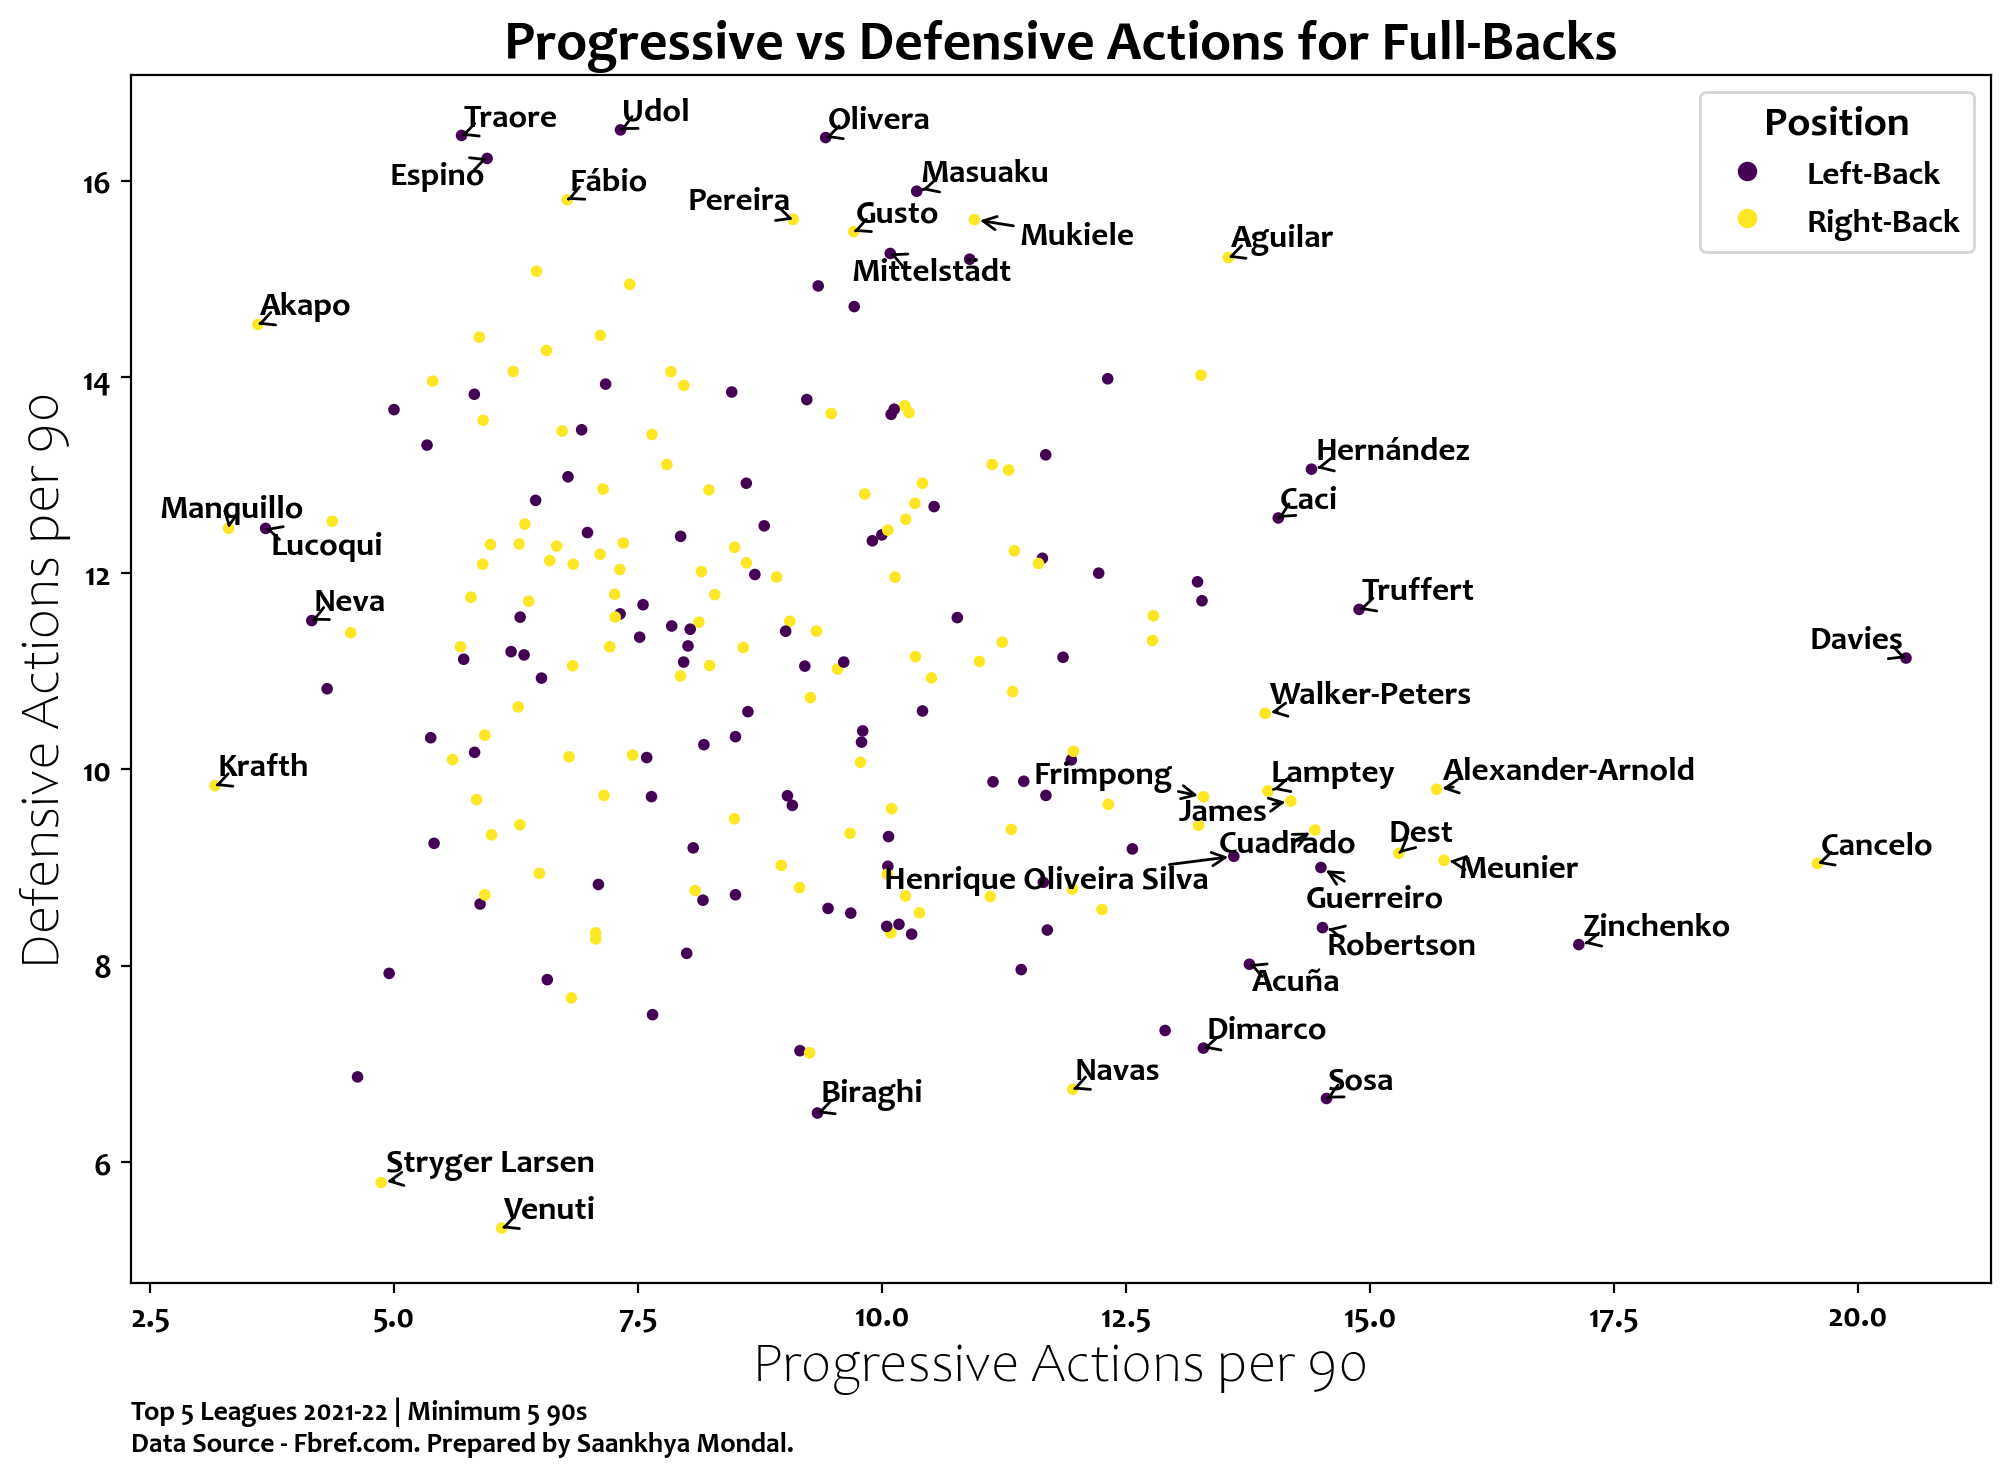

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
par_x = list(data['PAp90'])
par_y = list(data['DAp90'])
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, c=col_codes, s=10)

outlier_top = data['DAp90'].astype(float).quantile(0.96)
outlier_bottom = data['DAp90'].astype(float).quantile(0.02)
outlier_right = data['PAp90'].astype(float).quantile(0.91)
outlier_left = data['PAp90'].astype(float).quantile(0.02)

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top or par_x[i]<outlier_left or par_y[i]<outlier_bottom:
        if len(txt.split()) != 1:
            txt = ' '.join(txt.split()[1:])
        txts.append(plt.text(par_x[i], par_y[i], txt))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='black'))
ax.set_xlabel('Progressive Actions per 90', fontsize=20)
ax.set_ylabel('Defensive Actions per 90', fontsize=20)
ax.set_title('Progressive vs Defensive Actions for Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [14]:
fig.savefig('Images/PAp90vDAp90_FB.png', dpi=400, bbox_inches='tight')

In [15]:
data = pd.merge(player_position, d, on="Player")
data.drop_duplicates(inplace=True)
data['Progressive Actions'] = data['Prog Passes'] + data['DribblesS'] + data['Prog Carries']
data['Defensive Actions'] = data['TklW'] + data['PressureS'] + data['Blocks'] + data['Int'] + data['Clr']
data = data[data['90s']>=5.0]
data['PAp90'] = data['Progressive Actions']/data['90s']
data['DAp90'] = data['Defensive Actions']/data['90s']
who = ['Centre-Back']
data = data[data['Position'].apply(lambda x: x in who)]
data

,S. No.,Player,Position,90s,Touches,Prog Passes,DribblesS,Prog Carries,TklW,PressureS,Blocks,Int,Clr,Progressive Actions,Defensive Actions,PAp90,DAp90
0,4,Yunis Abdelhamid,Centre-Back,21.0,1201.0,48.0,11.0,51.0,29.0,109.0,44.0,73.0,69.0,110.0,324.0,5.238095,15.428571
5,15,Francesco Acerbi,Centre-Back,17.1,1413.0,66.0,1.0,63.0,8.0,27.0,30.0,33.0,77.0,130.0,175.0,7.602339,10.233918
15,30,Nayef Aguerd,Centre-Back,17.9,1482.0,51.0,3.0,43.0,8.0,37.0,19.0,27.0,95.0,97.0,186.0,5.418994,10.391061
20,38,Joseph Aidoo,Centre-Back,13.3,785.0,37.0,2.0,42.0,19.0,60.0,25.0,27.0,56.0,81.0,187.0,6.090226,14.06015
24,44,Manuel Akanji,Centre-Back,15.4,1289.0,70.0,3.0,71.0,24.0,77.0,21.0,26.0,49.0,144.0,197.0,9.350649,12.792208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,2715,Stefan de Vrij,Centre-Back,15.7,1003.0,23.0,2.0,38.0,20.0,52.0,10.0,18.0,52.0,63.0,152.0,4.012739,9.681529
1851,2736,Adam Webster,Centre-Back,11.0,953.0,54.0,6.0,61.0,8.0,27.0,21.0,22.0,48.0,121.0,126.0,11.0,11.454545
1856,2745,Ben White,Centre-Back,19.0,1183.0,48.0,6.0,49.0,16.0,48.0,31.0,43.0,58.0,103.0,196.0,5.421053,10.315789
1880,2781,Maya Yoshida,Centre-Back,16.6,896.0,34.0,3.0,21.0,11.0,37.0,27.0,41.0,66.0,58.0,182.0,3.493976,10.963855


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

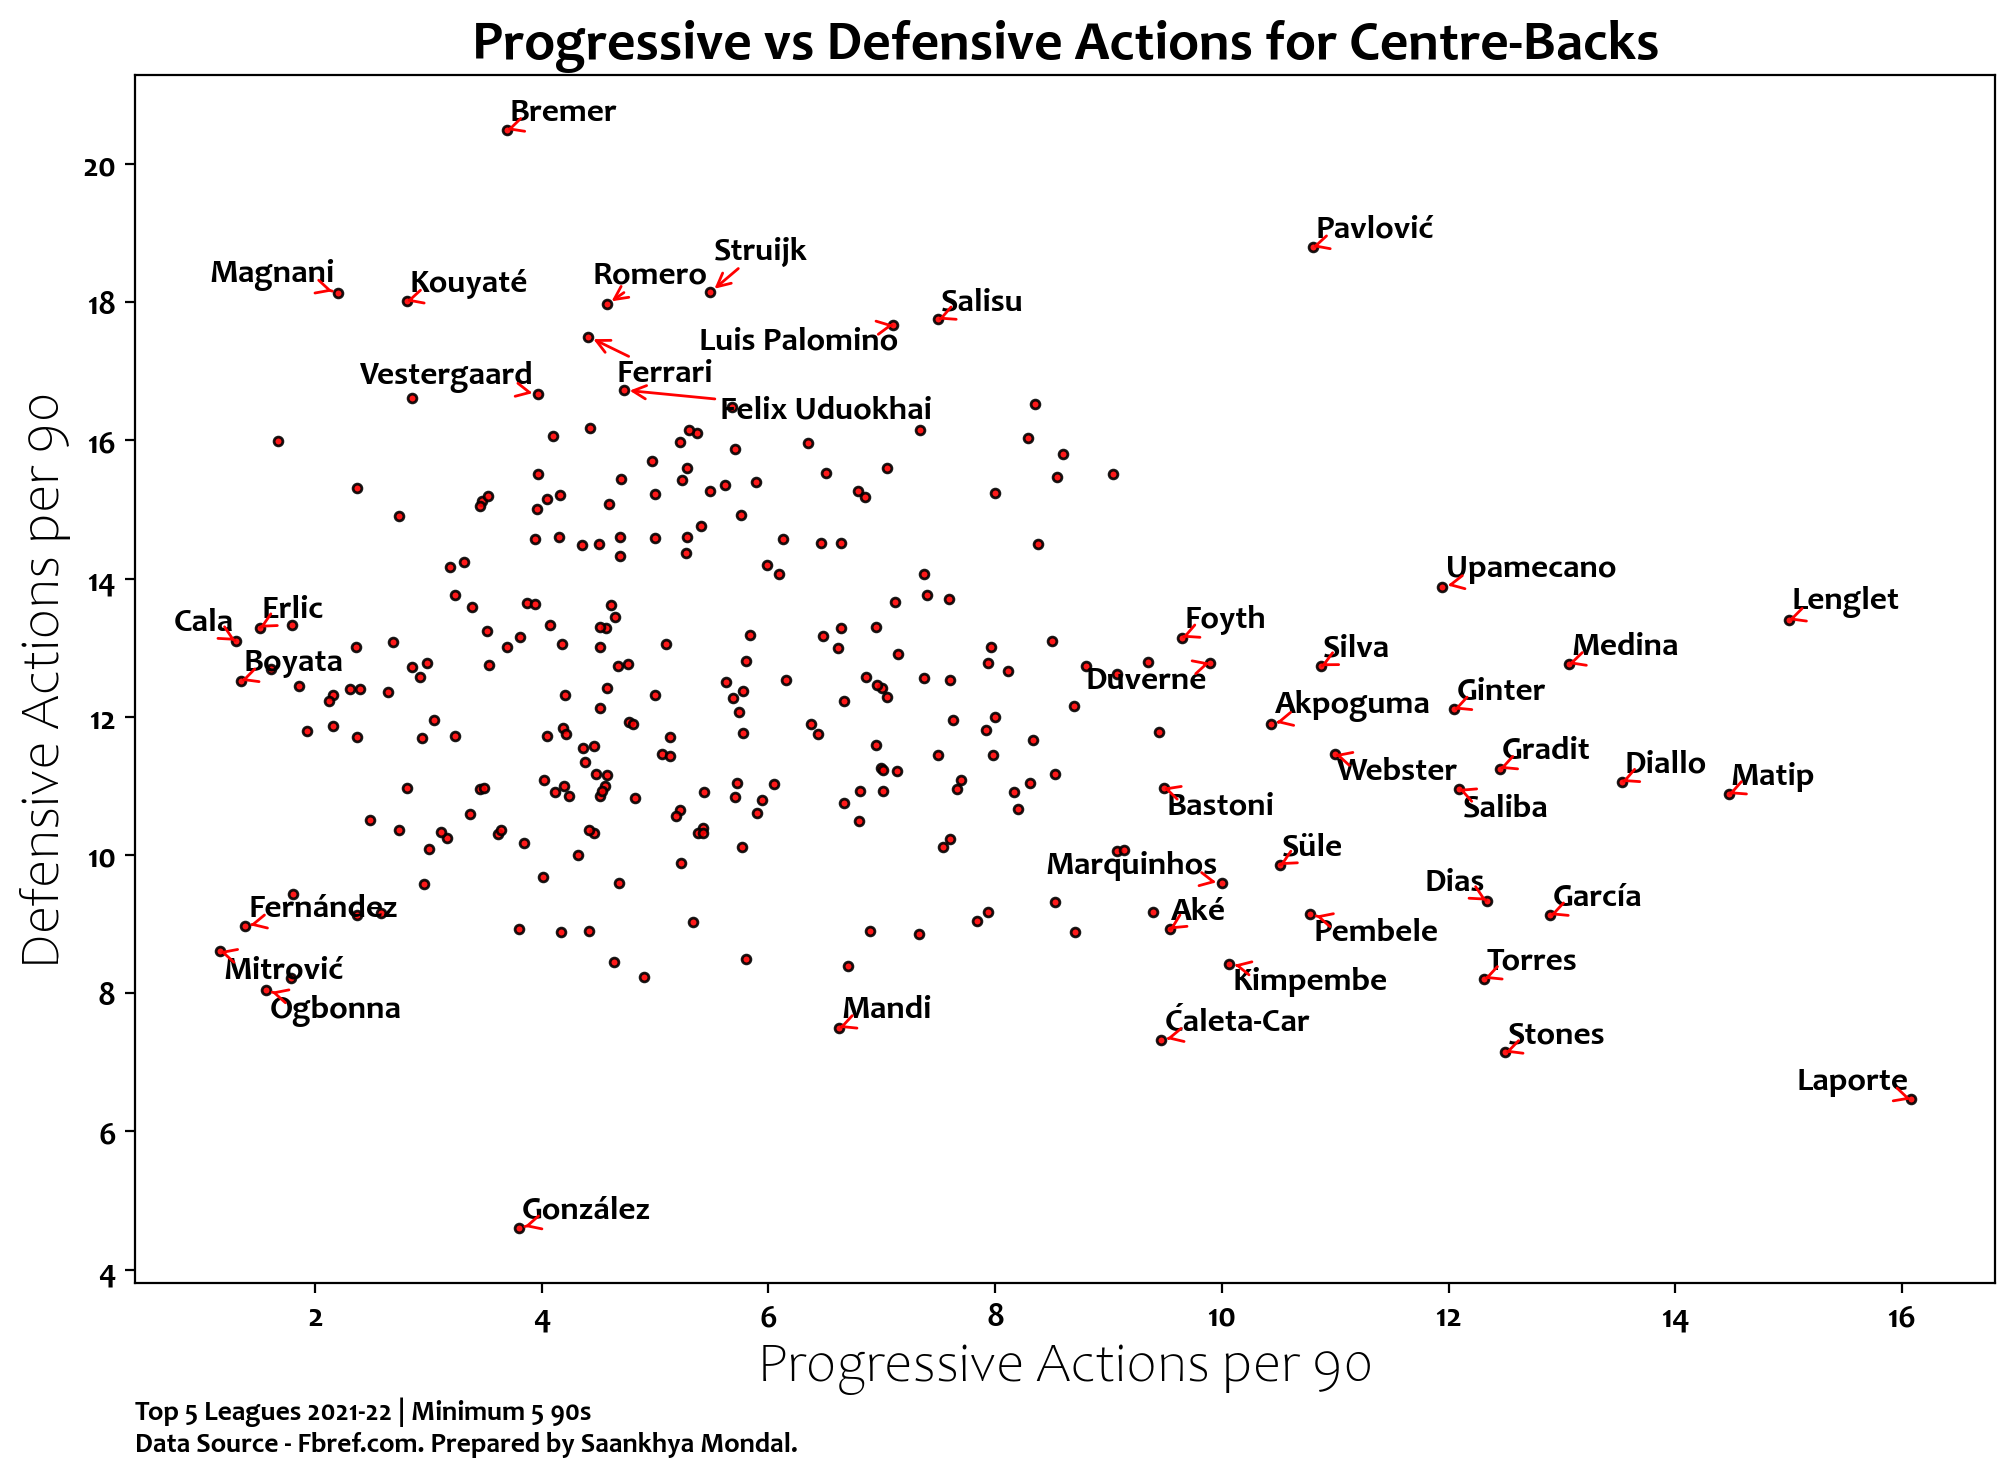

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
par_x = list(data['PAp90'])
par_y = list(data['DAp90'])
scatter = plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')

outlier_top = data['DAp90'].astype(float).quantile(0.96)
outlier_bottom = data['DAp90'].astype(float).quantile(0.02)
outlier_right = data['PAp90'].astype(float).quantile(0.91)
outlier_left = data['PAp90'].astype(float).quantile(0.02)

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top or par_x[i]<outlier_left or par_y[i]<outlier_bottom:
        if len(txt.split()) != 1:
            txt = ' '.join(txt.split()[1:])
        txts.append(plt.text(par_x[i], par_y[i], txt))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))
ax.set_xlabel('Progressive Actions per 90', fontsize=20)
ax.set_ylabel('Defensive Actions per 90', fontsize=20)
ax.set_title('Progressive vs Defensive Actions for Centre-Backs', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [17]:
fig.savefig('Images/PAp90vDAp90_CB.png', dpi=400, bbox_inches='tight')